## Homework 3
### Part 1: Imbalanced Dataset

- In this homework, you will be working with an imbalanced Dataset. 
- The dataset is Credit Card Fraud Detection dataset which was hosted on Kaggle. 
- The aim is to detect fraudlent transactions.

### Instructions

1) Please push the .ipynb and .pdf to Github Classroom prior to the deadline, .py file is optional (not needed).<br>
2) Please include your Name and UNI below.

### Name: Arjun Bhan
### UNI: AB5666

### Setup

In [1]:
import imblearn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix

In [3]:
# Feel free to import any other packages you need

### **Data Preprocessing and Exploration**.
- Download the Kaggle Credit Card Fraud data set.<br>
- Features V1, V2, … V27, V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.<br>
- Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. <br>
- The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning.<br>
- Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [4]:
raw_df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
raw_df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


### **Examining the class Imbalance**
**1.1 How many observations are in this dataset? How many are positive and negative?** <br>
(Note: Positive labels are labeled as 1)

In [5]:
raw_df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [6]:
raw_df['Class'].value_counts(normalize = True)

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

In [7]:
print("There are ", raw_df['Class'].value_counts()[0], "negative values")
print("There are ", raw_df['Class'].value_counts()[1], "positive values")

There are  284315 negative values
There are  492 positive values


In [8]:
#There are 284315 negative and 492 positive values 

#### **1.2 Cleaning and normalizing the data**
The raw data has a few issues. <br>
Since we are unsure what the time column actually means so drop the Time column. 
The Amount column also has a wide range of values covered so we take the log of the Amount column to reduce its range. <br>

The below is already done for you.

In [9]:
cleaned_df = raw_df.copy()

# You don't want the 'Time' column. Pop it off
cleaned_df.pop('Time')

# The 'Amount' column covers a huge range. Convert it to log-space.
eps = 0.001
cleaned_df['Log Amount'] = np.log(cleaned_df.pop('Amount') + eps)

**1.2.1 Split the dataset into development and test sets. Set test size as 20% and random state as 42. Print the shape of your development and test features**

In [10]:
y = cleaned_df['Class']
X = cleaned_df.drop('Class', axis = 1)

In [11]:
# Your Code Here
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size = .2, random_state = 42, stratify=y)

In [12]:
print(X_dev.shape)
print(X_test.shape)
print(y_test.shape)
print(y_dev.shape)

(227845, 29)
(56962, 29)
(56962,)
(227845,)


**1.2.2 Normalize the features using Standard Scaler from Sklearn.**

In [13]:
# Your Code Here
stanScaler = StandardScaler()
X_dev = stanScaler.fit_transform(X_dev)
X_test = stanScaler.transform(X_test)


### **Default Baseline**
**1.3.1 First, let us fit a default Decision tree classifier (use max_depth=10 and random_state=42). Print the AUC and Average Precision values of 5 Fold Cross Validation**

In [14]:
# Your Code Here
clf = DecisionTreeClassifier(max_depth = 10, random_state = 42)
scores = cross_validate(clf, X_dev, y_dev, cv = 5, scoring = ['average_precision', 'roc_auc'])

In [15]:
print("AUC:", scores['test_roc_auc'].mean())
print("Average Precision values:", scores['test_average_precision'].mean())

AUC: 0.8359524571279693
Average Precision values: 0.641744070059615


In [16]:
print("AUC:", scores['test_roc_auc'])
print("Average Precision values:", scores['test_average_precision'])

AUC: [0.88756328 0.88400873 0.81260522 0.77454358 0.82104149]
Average Precision values: [0.62653551 0.71014615 0.60399496 0.58692296 0.68112078]


In [17]:
clf.fit(X_dev, y_dev)

DecisionTreeClassifier(max_depth=10, random_state=42)

### **Random Oversampling**
**1.3.2 Perform random oversampling on the development dataset.**

*   How many positive and negative labels do you observe after random oversampling?
*   What is the shape of your development dataset?

(Note: Set random state as 42 when performing oversampling)

In [18]:
# Your Code Here
ros = RandomOverSampler(random_state = 42)
x_dev_over_sample, y_dev_over_sample = ros.fit_resample(X_dev, y_dev)

In [19]:
y_dev_over_sample.value_counts()


Class
0    227451
1    227451
Name: count, dtype: int64

In [20]:
y_dev_over_sample.value_counts(normalize = True)

Class
0    0.5
1    0.5
Name: proportion, dtype: float64

In [21]:
print("There are ", y_dev_over_sample.value_counts()[0], "negative values")
print("There are ",y_dev_over_sample.value_counts()[1], "positive values")

There are  227451 negative values
There are  227451 positive values


In [22]:
print('x shape', x_dev_over_sample.shape)
print('y shape', y_dev_over_sample.shape)

x shape (454902, 29)
y shape (454902,)


**1.3.3 Repeat 1.3.1 using the dataset you created in the above step (1.3.2 Random oversampling). <br>(Make sure you use the same hyperparameters as 1.3.1. i.e., max_depth=10, random_state=42 and 5 Fold Cross Validation) <br>
This will help us to compare the models.**

In [23]:
clfOverSamp = DecisionTreeClassifier(max_depth = 10, random_state = 42)
scoresOverSamp = cross_validate(clfOverSamp, x_dev_over_sample, y_dev_over_sample, cv = 5, scoring = ['average_precision', 'roc_auc'])

In [24]:
print("AUC:", scoresOverSamp['test_roc_auc'].mean())
print("Average Precision values:",scoresOverSamp['test_average_precision'].mean())

AUC: 0.9991528810903473
Average Precision values: 0.9985380738652964


In [25]:
print("AUC:", scoresOverSamp['test_roc_auc'])
print("Average Precision values:", scoresOverSamp['test_average_precision'])

AUC: [0.99886808 0.99929956 0.99900977 0.99926441 0.99932258]
Average Precision values: [0.99816396 0.99884446 0.99826911 0.9986672  0.99874564]


In [26]:
clfOverSamp.fit(x_dev_over_sample, y_dev_over_sample)

DecisionTreeClassifier(max_depth=10, random_state=42)

### **Random Undersampling**
**1.3.4 Perform Random undersampling on the development dataset.**

- How many positive and negative labels do you observe after random undersampling?
- What is the shape of your development dataset?

(Note: Set random state as 42 when performing undersampling)

In [27]:
# Your Code Here
rus = RandomUnderSampler(random_state = 42)
x_dev_under_sample, y_dev_under_sample = rus.fit_resample(X_dev, y_dev)

In [28]:
y_dev_under_sample.value_counts(normalize = True)

Class
0    0.5
1    0.5
Name: proportion, dtype: float64

In [29]:
y_dev_under_sample.value_counts()

Class
0    394
1    394
Name: count, dtype: int64

In [30]:
print("There are ", y_dev_under_sample.value_counts()[0], "negative values")
print("There are ",y_dev_under_sample.value_counts()[1], "positive values")

There are  394 negative values
There are  394 positive values


In [31]:
print('x shape', x_dev_under_sample.shape)
print('y shape', y_dev_under_sample.shape)

x shape (788, 29)
y shape (788,)


**1.3.5 Repeat 1.3.1 using the dataset you created in the above step(1.3.4 Random undersampling).<br>(Make sure you use the same hyperparameters as 1.3.1. i.e., max_depth=10, random_state=42 and 5 Fold Cross Validation)<br>
This will help us to compare the models**

In [32]:
# Your Code Here
clfUnderSamp = DecisionTreeClassifier(max_depth = 10, random_state = 42)
scoresUnderSamp = cross_validate(clfUnderSamp, x_dev_under_sample, y_dev_under_sample, cv = 5, scoring = ['average_precision', 'roc_auc'])

In [33]:
print("AUC:", scoresUnderSamp['test_roc_auc'].mean())
print("Average Precision values:", scoresUnderSamp['test_average_precision'].mean())

AUC: 0.9303029182535673
Average Precision values: 0.9022723811037444


In [34]:
print("AUC:", scoresUnderSamp['test_roc_auc'])
print("Average Precision values:", scoresUnderSamp['test_average_precision'])

AUC: [0.93662875 0.94936709 0.9097901  0.92583577 0.92989289]
Average Precision values: [0.91336577 0.92661432 0.86678359 0.90629539 0.89830283]


In [35]:
clfUnderSamp.fit(x_dev_under_sample, y_dev_under_sample)

DecisionTreeClassifier(max_depth=10, random_state=42)

### **SMOTE**
**1.3.6 Perform Synthetic Minority Oversampling Technique (SMOTE) on the development dataset**

- How many positive and negative labels do you observe after performing SMOTE?
- What is the shape of your development dataset?

(Note: Set random state as 42 when performing SMOTE)

In [36]:
rus = SMOTE(random_state = 42)
x_dev_smote_sample, y_dev_smote_sample = rus.fit_resample(X_dev, y_dev)

In [37]:
y_dev_smote_sample.value_counts(normalize = True)

Class
0    0.5
1    0.5
Name: proportion, dtype: float64

In [38]:
y_dev_smote_sample.value_counts()

Class
0    227451
1    227451
Name: count, dtype: int64

In [39]:
print("There are ", y_dev_smote_sample.value_counts()[0], "negative values")
print("There are ",y_dev_smote_sample.value_counts()[1], "positive values")

There are  227451 negative values
There are  227451 positive values


In [40]:
print('x shape', x_dev_smote_sample.shape)
print('y shape', y_dev_smote_sample.shape)

x shape (454902, 29)
y shape (454902,)


**1.3.7 Repeat 1.3.1 using the dataset you created in the above step(1.3.4 SMOTE).<br>(Make sure you use the same hyperparameters as 1.3.1. i.e., max_depth=10, random_state=42 and 5 Fold Cross Validation)<br>
This will help us to compare the models**

In [41]:
# Your Code Here
clfSmote = DecisionTreeClassifier(max_depth = 10, random_state = 42)
scoresSmote = cross_validate(clfSmote, x_dev_smote_sample, y_dev_smote_sample, cv = 5, scoring = ['average_precision', 'roc_auc'])

In [42]:
print("AUC:", scoresSmote['test_roc_auc'].mean()), 
print("Average Precision values:", scoresSmote['test_average_precision'].mean())

AUC: 0.9974175030591891
Average Precision values: 0.9964575330041552


In [43]:
print("AUC:", scoresSmote['test_roc_auc'])
print("Average Precision values:", scoresSmote['test_average_precision'])

AUC: [0.99757923 0.99738426 0.99772842 0.9972463  0.99714931]
Average Precision values: [0.99667622 0.99645425 0.99685462 0.99619248 0.99611009]


In [44]:
clfSmote.fit(x_dev_smote_sample, y_dev_smote_sample)

DecisionTreeClassifier(max_depth=10, random_state=42)

### **Balanced Weight**

**1.3.8 Train a balanced default Decision tree classifier. <br> [ use max_depth=10 and random_state=42 and balance the class weights with 5 Fold Cross Validation ] <br>
Print the AUC and average precision on dev set**

In [45]:
# Your Code Here
clfBalWei = DecisionTreeClassifier(max_depth = 10, random_state = 42, class_weight = 'balanced')
scoresBalWei = cross_validate(clfBalWei, X_dev, y_dev, cv = 5, scoring = ['average_precision', 'roc_auc'])

In [46]:
print("AUC:", scoresBalWei['test_roc_auc'].mean())
print("Average Precision values:", scoresBalWei['test_average_precision'].mean())

AUC: 0.905514887383234
Average Precision values: 0.5236357414975382


In [47]:
print("AUC:", scoresBalWei['test_roc_auc'])
print("Average Precision values:", scoresBalWei['test_average_precision'])

AUC: [0.88026358 0.95432645 0.90415573 0.91647782 0.87235086]
Average Precision values: [0.51935587 0.573068   0.50745277 0.56269097 0.4556111 ]


In [48]:
clfBalWei.fit(X_dev, y_dev)

DecisionTreeClassifier(class_weight='balanced', max_depth=10, random_state=42)

### **Model Prediction & Evaluation**
**1.4.1 Make predictions on the test set using the five models that you built and report their AUC values.**<br>
(Five models include models from - Default Baseline, Random Undersampling, Random Oversampling, SMOTE & Balanced Weight)

In [49]:
tradProba = clf.predict_proba(X_test)[:, 1]
underProba = clfUnderSamp.predict_proba(X_test)[:, 1]
overProba = clfOverSamp.predict_proba(X_test)[:, 1]
smoteProba = clfSmote.predict_proba(X_test)[:, 1]
weightProba = clfBalWei.predict_proba(X_test)[:, 1]

In [50]:
aucTrad = roc_auc_score(y_test, tradProba)
undTrad = roc_auc_score(y_test, underProba)
overTrad = roc_auc_score(y_test, overProba)
smoteTrad = roc_auc_score(y_test, smoteProba)
weightTrad = roc_auc_score(y_test, weightProba)

In [51]:
tradPred= clf.predict(X_test)
overPred = clfOverSamp.predict(X_test)
underPred = clfUnderSamp.predict(X_test)
smotePred = clfSmote.predict(X_test)
weightPred = clfBalWei.predict(X_test)

In [52]:
print('Default Baseline', aucTrad)
print('Random Undersampling', undTrad)
print('Random Overampling', overTrad)
print('SMOTE', smoteTrad)
print('Balanced Weight', weightTrad)

Default Baseline 0.8196316775866227
Random Undersampling 0.8959979162599198
Random Overampling 0.9016732009348478
SMOTE 0.8752678248423735
Balanced Weight 0.9017402244381152


**1.4.2 Plot Confusion Matrices for all the five models on the test set. Comment your results and share your observations of the confusion matrices in detail (Explanation carries lot of points)**<br>
(Five models include models from - Default Baseline, Random Undersampling, Random Oversampling, SMOTE & Balanced Weight)

In [53]:
tradPred= clf.predict(X_test)
overPred = clfOverSamp.predict(X_test)
underPred = clfUnderSamp.predict(X_test)
smotePred = clfSmote.predict(X_test)
weightPred = clfBalWei.predict(X_test)

<Axes: title={'center': 'Default Confusion Matrix'}>

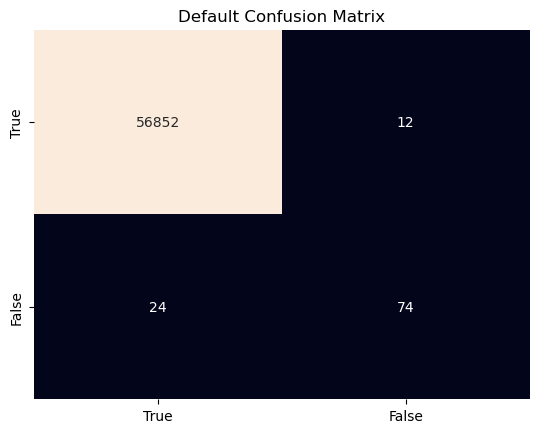

In [54]:
className = ["True", "False"]
plt.title('Default Confusion Matrix')
sns.heatmap(confusion_matrix(y_test, tradPred), fmt = 'd', annot = True, xticklabels = className, yticklabels = className, cbar = False)

<Axes: title={'center': 'UnderSampler Confusion Matrix'}>

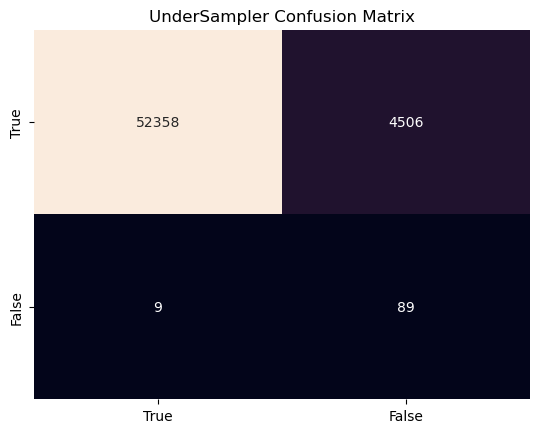

In [55]:
plt.title('UnderSampler Confusion Matrix')
sns.heatmap(confusion_matrix(y_test, underPred), fmt = 'd', annot = True, xticklabels = className, yticklabels = className, cbar = False)

<Axes: title={'center': 'OverSampler Confusion Matrix'}>

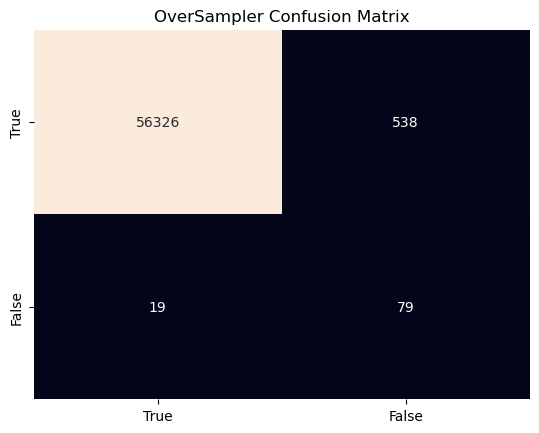

In [56]:
plt.title('OverSampler Confusion Matrix')
sns.heatmap(confusion_matrix(y_test, overPred), fmt = 'd', annot = True, xticklabels = className, yticklabels = className, cbar = False)

<Axes: title={'center': 'SMOTE Confusion Matrix'}>

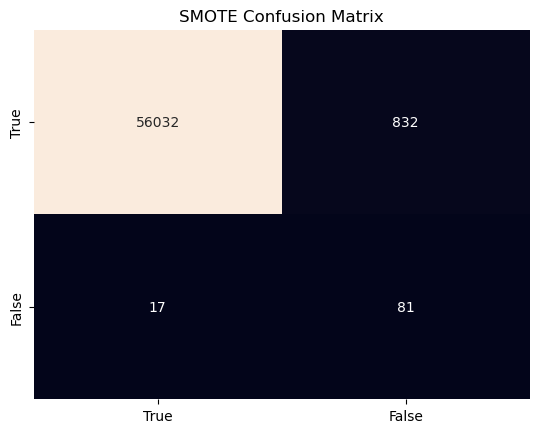

In [57]:
plt.title('SMOTE Confusion Matrix')

sns.heatmap(confusion_matrix(y_test, smotePred), fmt = 'd', annot = True, xticklabels = className, yticklabels = className, cbar = False)


<Axes: title={'center': 'Balanced Weight Confusion Matrix'}>

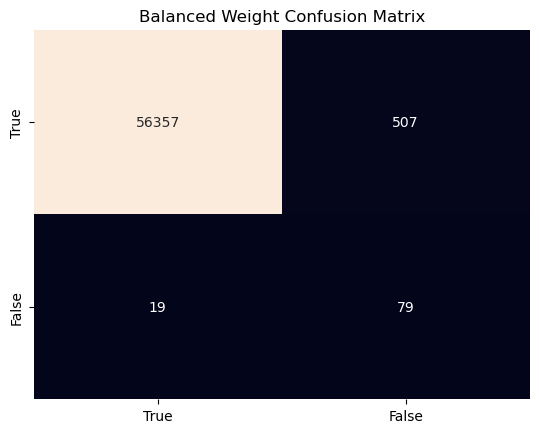

In [58]:
plt.title('Balanced Weight Confusion Matrix')
sns.heatmap(confusion_matrix(y_test, weightPred), fmt = 'd', annot = True, xticklabels = className, yticklabels = className, cbar = False)

In [59]:
"""
The default model is the most accurate for true positive and is the worst for true negatives. This makes sense since
the default model isn't adjusting itself enough for the minority class. This means it would have issues predicting the minority
class but, would be very adapted to predicting the majority class. Because the default model is not as well tuned to 
detect minority class it is less sensitive to them and more likley to miss them resulting in lower true negatives. 
But because of the amount the model that is tunned for the majority class which comprises the majority of the data it will
have a very good true postive amount. 

Random under sampling is best in terms of true negative but has the worst true positive. This make sense since the
majority class is being reduced down because of under sampling so it would be able to predict the minority class better but 
the majority class it would be predicting worse than the default model. It is less sensitive to the majority class and is 
more likley to miss them resulting in the lower amount of true positive but it is higher in terms true negative because
it is more senstives to the minority class. 

Oversampling and SMOTE are similar in terms of their confusion matrix. This makes sense since oversampling and SMOTE keep
the same size of the majority class but, increase the minority class size. The main difference between them is that 
oversampling duplicates the data in the minority class while SMOTE inputs data that is similar to the minority class in.
They both do better than the default model in terms of their true negatives which makes sense since they are
adjusting their data for the minority class. They both do worse in terms of true postivies compared to the default model
as they are less adjusted to the majority class. 

The balanced weight model is worse than the default model in terms of true positive but better in terms of true negative. 
This makes sense since the balanced weight is using weights to place more importance on the minority 
class so the model would be more adapted to the minority class's data. By using weights to increase the importance of the 
minority class the model is less adapted to the  majority class. It is less sensitive to the majority class and is 
more likley to miss them resulting in the lower amount of true positive but it is higher in terms true negative because
it is more senstives to the minority class. 

"""

"\nThe default model is the most accurate for true positive and is the worst for true negatives. This makes sense since\nthe default model isn't adjusting itself enough for the minority class. This means it would have issues predicting the minority\nclass but, would be very adapted to predicting the majority class. Because the default model is not as well tuned to \ndetect minority class it is less sensitive to them and more likley to miss them resulting in lower true negatives. \nBut because of the amount the model that is tunned for the majority class which comprises the majority of the data it will\nhave a very good true postive amount. \n\nRandom under sampling is best in terms of true negative but has the worst true positive. This make sense since the\nmajority class is being reduced down because of under sampling so it would be able to predict the minority class better but \nthe majority class it would be predicting worse than the default model. It is less sensitive to the majori

**1.4.3 Plot ROC for all the five models on the test set in a single plot. Make sure you label axes and legend properly. Comment on your results and share your observations in detail (Explanation carries lot of points)**<br>
(Five models include models from - Default Baseline, Random Undersampling, Random Oversampling, SMOTE & Balanced Weight)

In [60]:
tra_fpr, tra_tpr, _ = metrics.roc_curve(y_test, tradProba)
ov_fpr, ov_tpr, _ = metrics.roc_curve(y_test, overProba)
und_fpr, und_tpr, _ = metrics.roc_curve(y_test, underProba)
smo_fpr, smo_tpr, _ = metrics.roc_curve(y_test, smoteProba)
wei_fpr, wei_tpr, _ = metrics.roc_curve(y_test, weightProba)

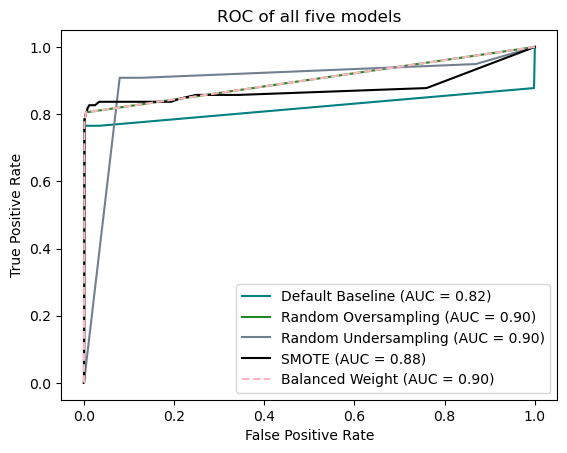

In [61]:

plt.plot(tra_fpr, tra_tpr, label = 'Default Baseline (AUC = 0.82)', color = 'teal')
plt.plot(ov_fpr, ov_tpr, label = 'Random Oversampling (AUC = 0.90)', color = 'forestgreen' )
plt.plot(und_fpr, und_tpr, label = 'Random Undersampling (AUC = 0.90)', color = 'slategrey')
plt.plot(smo_fpr, smo_tpr, label = 'SMOTE (AUC = 0.88)'%auc(smo_fpr, smo_tpr), color = 'black')
#using dotted line for Balanced Weight so Random Oversampling can be seen
plt.plot(wei_fpr, wei_tpr, label = 'Balanced Weight (AUC = 0.90)', color = 'lightpink', linestyle = '--')
plt.plot()
plt.title('ROC of all five models')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [62]:
"""
This graph shows that balanced weight and oversampling have similar true positive, false positive rate. 
This suggests that the performance these models are similiar. This is also supported by their very close AUC scores.
They both have higher AUC scores than the rest of the models which helps indicate them as the better performing models.
Balanced weight perform slightly better than oversampling in terms of AUC score. Of course both these method have problems.
Balanced weight uses weight to give higher importance to the minority class but can cause issues as it is artifically 
boosting the importance of the minority class data over the majority class. This can cause the model to overfit on the
minority class. Random overfitting has a problem in terms of over fitting as we are duplicating the minority class in order to 
equalize the amount of data in the minority and majority class. We are duplicating the same data over again which can cause the 
model to overfit on those duplicated data point. 

Undersampling has the best true postive to false postive rate for a large part of the graph which shows it as an effective 
model. Its AUC score was not that far from balanced weight and oversampling and they were rounded to the same values in the  
graph. This could show simular effectivness between these 3 models. The issue with undersampling is that it takes away data 
from the model which can result in the model not having enough data to make good predictions on.

The default has the worst true positive rate to false postive rate and has the lowest AUC rating. Because the data is imbalanced 
it can have be poorly fitted to the minority class and predict for it poorly. This is a possible reason for its worse true 
positive rate to false postive rate and AUC rating

SMOTE has the second worst AUC score and for a large part of the graph has the second worst true postive to negative rate. 
It is able to generate similar instances of the minority class into the data. Since the data is synthetic it can train the 
model on fake data which can cause ishues within its training. 
"""

'\nThis graph shows that balanced weight and oversampling have similar true positive, false positive rate. \nThis suggests that the performance these models are similiar. This is also supported by their very close AUC scores.\nThey both have higher AUC scores than the rest of the models which helps indicate them as the better performing models.\nBalanced weight perform slightly better than oversampling in terms of AUC score. Of course both these method have problems.\nBalanced weight uses weight to give higher importance to the minority class but can cause issues as it is artifically \nboosting the importance of the minority class data over the majority class. This can cause the model to overfit on the\nminority class. Random overfitting has a problem in terms of over fitting as we are duplicating the minority class in order to \nequalize the amount of data in the minority and majority class. We are duplicating the same data over again which can cause the \nmodel to overfit on those du